## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    # 建立一個有三層隱藏層之神經網路
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=128, activation="relu")(input_layer)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 99us/step - loss: 2.0112 - acc: 0.2683 - val_loss: 1.8599 - val_acc: 0.3362
Epoch 2/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.7993 - acc: 0.3585 - val_loss: 1.7468 - val_acc: 0.3761
Epoch 3/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.7235 - acc: 0.3869 - val_loss: 1.6594 - val_acc: 0.4036
Epoch 4/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.6422 - acc: 0.4160 - val_loss: 1.6361 - val_acc: 0.4091
Epoch 5/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.6028 - acc: 0.4310 - val_loss: 1.5778 - val_acc: 0.4328
Epoch 6/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.5657 - acc: 0.4405 - val_loss: 1.5710 - val_acc: 0.4336
Epoch 7/500
50000/50000 [==============================] - 4s 88us/step - 

Epoch 58/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.1436 - acc: 0.5929 - val_loss: 1.4187 - val_acc: 0.5037
Epoch 59/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.1267 - acc: 0.5990 - val_loss: 1.4386 - val_acc: 0.4983
Epoch 60/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.1269 - acc: 0.5960 - val_loss: 1.4432 - val_acc: 0.5025
Epoch 61/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.1289 - acc: 0.5986 - val_loss: 1.4457 - val_acc: 0.5033
Epoch 62/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.1261 - acc: 0.5965 - val_loss: 1.4556 - val_acc: 0.4957
Epoch 63/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.1230 - acc: 0.5971 - val_loss: 1.4198 - val_acc: 0.5091
Epoch 64/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.1113 - acc: 0.6027 - val_loss: 1.4682 - val_acc: 0.5013
Epoch 65/500
50000/50000 [=

Epoch 117/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.9858 - acc: 0.6475 - val_loss: 1.5248 - val_acc: 0.5037
Epoch 118/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.9852 - acc: 0.6494 - val_loss: 1.5594 - val_acc: 0.5028
Epoch 119/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.9828 - acc: 0.6487 - val_loss: 1.5413 - val_acc: 0.4990
Epoch 120/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.9829 - acc: 0.6489 - val_loss: 1.5868 - val_acc: 0.4932
Epoch 121/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.9797 - acc: 0.6498 - val_loss: 1.5416 - val_acc: 0.5056
Epoch 122/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.9789 - acc: 0.6497 - val_loss: 1.5652 - val_acc: 0.4963
Epoch 123/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.9782 - acc: 0.6497 - val_loss: 1.5388 - val_acc: 0.5099
Epoch 124/500
50000/

50000/50000 [==============================] - 5s 94us/step - loss: 0.8924 - acc: 0.6802 - val_loss: 1.6762 - val_acc: 0.4911
Epoch 176/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8888 - acc: 0.6809 - val_loss: 1.6587 - val_acc: 0.4970
Epoch 177/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8817 - acc: 0.6838 - val_loss: 1.6850 - val_acc: 0.4955
Epoch 178/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8852 - acc: 0.6826 - val_loss: 1.6620 - val_acc: 0.4933
Epoch 179/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8844 - acc: 0.6809 - val_loss: 1.7068 - val_acc: 0.4912
Epoch 180/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8882 - acc: 0.6802 - val_loss: 1.6988 - val_acc: 0.4876
Epoch 181/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8873 - acc: 0.6830 - val_loss: 1.6938 - val_acc: 0.4966
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 5s 93us/step - loss: 0.8159 - acc: 0.7068 - val_loss: 1.8190 - val_acc: 0.4831
Epoch 234/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8113 - acc: 0.7079 - val_loss: 1.7952 - val_acc: 0.4888
Epoch 235/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.8249 - acc: 0.7050 - val_loss: 1.8464 - val_acc: 0.4854
Epoch 236/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.8171 - acc: 0.7065 - val_loss: 1.8120 - val_acc: 0.4866
Epoch 237/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.8221 - acc: 0.7056 - val_loss: 1.8125 - val_acc: 0.4888
Epoch 238/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.8089 - acc: 0.7111 - val_loss: 1.8767 - val_acc: 0.4848
Epoch 239/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.8171 - acc: 0.7077 - val_loss: 1.8436 - val_acc: 0.4879
Epoch 240/500
50000/50000 [=======

50000/50000 [==============================] - 5s 92us/step - loss: 0.7735 - acc: 0.7221 - val_loss: 1.9945 - val_acc: 0.4747
Epoch 292/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.7604 - acc: 0.7256 - val_loss: 1.9601 - val_acc: 0.4848
Epoch 293/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.7741 - acc: 0.7205 - val_loss: 1.9311 - val_acc: 0.4805
Epoch 294/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.7587 - acc: 0.7287 - val_loss: 1.9595 - val_acc: 0.4799
Epoch 295/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.7678 - acc: 0.7232 - val_loss: 1.9695 - val_acc: 0.4812
Epoch 296/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.7557 - acc: 0.7292 - val_loss: 1.9924 - val_acc: 0.4740
Epoch 297/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.7664 - acc: 0.7251 - val_loss: 1.9417 - val_acc: 0.4747
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 5s 93us/step - loss: 0.7280 - acc: 0.7377 - val_loss: 2.0913 - val_acc: 0.4726
Epoch 350/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.7183 - acc: 0.7395 - val_loss: 2.1301 - val_acc: 0.4747
Epoch 351/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.7208 - acc: 0.7410 - val_loss: 2.0983 - val_acc: 0.4773
Epoch 352/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.7147 - acc: 0.7430 - val_loss: 2.0619 - val_acc: 0.4819
Epoch 353/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.7103 - acc: 0.7443 - val_loss: 2.1461 - val_acc: 0.4690
Epoch 354/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.7169 - acc: 0.7429 - val_loss: 2.0601 - val_acc: 0.4731
Epoch 355/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.7259 - acc: 0.7388 - val_loss: 2.1149 - val_acc: 0.4710
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 5s 92us/step - loss: 0.6943 - acc: 0.7497 - val_loss: 2.1908 - val_acc: 0.4738
Epoch 408/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6664 - acc: 0.7612 - val_loss: 2.1967 - val_acc: 0.4741
Epoch 409/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6805 - acc: 0.7543 - val_loss: 2.2412 - val_acc: 0.4657
Epoch 410/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.6875 - acc: 0.7515 - val_loss: 2.2181 - val_acc: 0.4725
Epoch 411/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.6822 - acc: 0.7554 - val_loss: 2.2379 - val_acc: 0.4758
Epoch 412/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.6757 - acc: 0.7576 - val_loss: 2.2407 - val_acc: 0.4729
Epoch 413/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6838 - acc: 0.7531 - val_loss: 2.2538 - val_acc: 0.4665
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 5s 93us/step - loss: 0.6556 - acc: 0.7649 - val_loss: 2.4053 - val_acc: 0.4656
Epoch 466/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6445 - acc: 0.7687 - val_loss: 2.3828 - val_acc: 0.4666
Epoch 467/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6553 - acc: 0.7643 - val_loss: 2.3187 - val_acc: 0.4689
Epoch 468/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6502 - acc: 0.7654 - val_loss: 2.3525 - val_acc: 0.4684
Epoch 469/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6612 - acc: 0.7629 - val_loss: 2.3404 - val_acc: 0.4623
Epoch 470/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6358 - acc: 0.7716 - val_loss: 2.3410 - val_acc: 0.4661
Epoch 471/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6519 - acc: 0.7640 - val_loss: 2.3242 - val_acc: 0.4692
Epoch 472/500
50000/50000 [=======

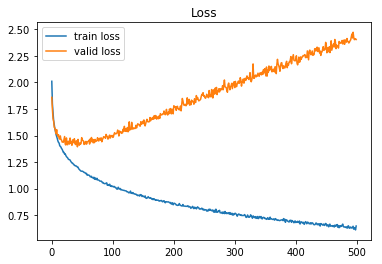

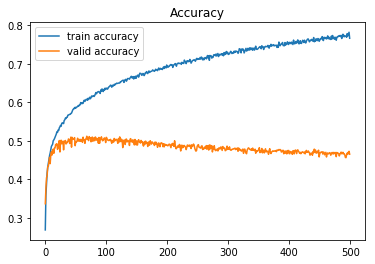

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# SGD

In [9]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [10]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    # 建立一個有三層隱藏層之神經網路
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=128, activation="relu")(input_layer)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________


In [13]:
"""
設定要訓練的 Epoch 數
"""
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 87us/step - loss: 2.2919 - acc: 0.1249 - val_loss: 2.2687 - val_acc: 0.1580
Epoch 2/500
50000/50000 [==============================] - 4s 79us/step - loss: 2.2531 - acc: 0.1778 - val_loss: 2.2410 - val_acc: 0.1905
Epoch 3/500
50000/50000 [==============================] - 4s 79us/step - loss: 2.2248 - acc: 0.1981 - val_loss: 2.2135 - val_acc: 0.2033
Epoch 4/500
50000/50000 [==============================] - 4s 78us/step - loss: 2.1994 - acc: 0.2092 - val_loss: 2.1906 - val_acc: 0.2065
Epoch 5/500
50000/50000 [==============================] - 4s 79us/step - loss: 2.1779 - acc: 0.2147 - val_loss: 2.1705 - val_acc: 0.2110
Epoch 6/500
50000/50000 [==============================] - 4s 80us/step - loss: 2.1582 - acc: 0.2192 - val_loss: 2.1523 - val_acc: 0.2195
Epoch 7/500
50000/50000 [==============================] - 4s 80us/step - loss: 2.1393 - acc: 0.2244 - val_loss: 2.1339 - 

50000/50000 [==============================] - 4s 86us/step - loss: 1.7401 - acc: 0.3891 - val_loss: 1.7439 - val_acc: 0.3839
Epoch 60/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.7368 - acc: 0.3905 - val_loss: 1.7407 - val_acc: 0.3871
Epoch 61/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.7333 - acc: 0.3927 - val_loss: 1.7403 - val_acc: 0.3824
Epoch 62/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.7304 - acc: 0.3927 - val_loss: 1.7364 - val_acc: 0.3868
Epoch 63/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.7272 - acc: 0.3935 - val_loss: 1.7340 - val_acc: 0.3900
Epoch 64/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.7239 - acc: 0.3952 - val_loss: 1.7292 - val_acc: 0.3908
Epoch 65/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.7209 - acc: 0.3957 - val_loss: 1.7260 - val_acc: 0.3907
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.5988 - acc: 0.4386 - val_loss: 1.6121 - val_acc: 0.4345
Epoch 119/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.5973 - acc: 0.4395 - val_loss: 1.6115 - val_acc: 0.4320
Epoch 120/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.5953 - acc: 0.4409 - val_loss: 1.6107 - val_acc: 0.4334
Epoch 121/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.5936 - acc: 0.4404 - val_loss: 1.6077 - val_acc: 0.4345
Epoch 122/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.5921 - acc: 0.4417 - val_loss: 1.6078 - val_acc: 0.4326
Epoch 123/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.5905 - acc: 0.4431 - val_loss: 1.6086 - val_acc: 0.4325
Epoch 124/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.5888 - acc: 0.4439 - val_loss: 1.6034 - val_acc: 0.4366
Epoch 125/500
50000/

50000/50000 [==============================] - 4s 86us/step - loss: 1.5182 - acc: 0.4687 - val_loss: 1.5462 - val_acc: 0.4555
Epoch 176/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.5171 - acc: 0.4687 - val_loss: 1.5510 - val_acc: 0.4511
Epoch 177/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.5160 - acc: 0.4684 - val_loss: 1.5456 - val_acc: 0.4551
Epoch 178/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.5145 - acc: 0.4695 - val_loss: 1.5474 - val_acc: 0.4532
Epoch 179/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.5135 - acc: 0.4693 - val_loss: 1.5496 - val_acc: 0.4544
Epoch 180/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.5124 - acc: 0.4710 - val_loss: 1.5470 - val_acc: 0.4571
Epoch 181/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.5108 - acc: 0.4713 - val_loss: 1.5418 - val_acc: 0.4571
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 4s 86us/step - loss: 1.4540 - acc: 0.4903 - val_loss: 1.5035 - val_acc: 0.4709
Epoch 234/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.4527 - acc: 0.4898 - val_loss: 1.5069 - val_acc: 0.4680
Epoch 235/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.4517 - acc: 0.4898 - val_loss: 1.5017 - val_acc: 0.4692
Epoch 236/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.4508 - acc: 0.4921 - val_loss: 1.5042 - val_acc: 0.4661
Epoch 237/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.4495 - acc: 0.4910 - val_loss: 1.5147 - val_acc: 0.4629
Epoch 238/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.4487 - acc: 0.4919 - val_loss: 1.5051 - val_acc: 0.4670
Epoch 239/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.4473 - acc: 0.4913 - val_loss: 1.5147 - val_acc: 0.4676
Epoch 240/500
50000/50000 [=======

50000/50000 [==============================] - 4s 87us/step - loss: 1.3971 - acc: 0.5118 - val_loss: 1.4832 - val_acc: 0.4698
Epoch 292/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.3967 - acc: 0.5115 - val_loss: 1.4692 - val_acc: 0.4784
Epoch 293/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.3950 - acc: 0.5116 - val_loss: 1.4700 - val_acc: 0.4799
Epoch 294/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.3952 - acc: 0.5125 - val_loss: 1.4709 - val_acc: 0.4818
Epoch 295/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.3938 - acc: 0.5121 - val_loss: 1.4672 - val_acc: 0.4780
Epoch 296/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.3933 - acc: 0.5124 - val_loss: 1.4639 - val_acc: 0.4839
Epoch 297/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.3917 - acc: 0.5127 - val_loss: 1.4715 - val_acc: 0.4782
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 4s 86us/step - loss: 1.3471 - acc: 0.5287 - val_loss: 1.4500 - val_acc: 0.4892
Epoch 350/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.3467 - acc: 0.5287 - val_loss: 1.4503 - val_acc: 0.4901
Epoch 351/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.3457 - acc: 0.5283 - val_loss: 1.4423 - val_acc: 0.4871
Epoch 352/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.3446 - acc: 0.5293 - val_loss: 1.4476 - val_acc: 0.4896
Epoch 353/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.3434 - acc: 0.5304 - val_loss: 1.4443 - val_acc: 0.4893
Epoch 354/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.3434 - acc: 0.5302 - val_loss: 1.4423 - val_acc: 0.4851
Epoch 355/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.3417 - acc: 0.5309 - val_loss: 1.4492 - val_acc: 0.4881
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 4s 86us/step - loss: 1.3004 - acc: 0.5431 - val_loss: 1.4216 - val_acc: 0.4949
Epoch 408/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.3002 - acc: 0.5442 - val_loss: 1.4391 - val_acc: 0.4929
Epoch 409/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.2998 - acc: 0.5455 - val_loss: 1.4251 - val_acc: 0.4908
Epoch 410/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.2983 - acc: 0.5452 - val_loss: 1.4494 - val_acc: 0.4889
Epoch 411/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.2982 - acc: 0.5442 - val_loss: 1.4220 - val_acc: 0.4951
Epoch 412/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.2974 - acc: 0.5466 - val_loss: 1.4183 - val_acc: 0.4947
Epoch 413/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.2970 - acc: 0.5466 - val_loss: 1.4301 - val_acc: 0.4955
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 4s 85us/step - loss: 1.2590 - acc: 0.5584 - val_loss: 1.4099 - val_acc: 0.5014
Epoch 466/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.2579 - acc: 0.5572 - val_loss: 1.4120 - val_acc: 0.5014
Epoch 467/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.2576 - acc: 0.5583 - val_loss: 1.4054 - val_acc: 0.5031
Epoch 468/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.2563 - acc: 0.5588 - val_loss: 1.4244 - val_acc: 0.4997
Epoch 469/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.2559 - acc: 0.5597 - val_loss: 1.4318 - val_acc: 0.4942
Epoch 470/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.2541 - acc: 0.5592 - val_loss: 1.4465 - val_acc: 0.4903
Epoch 471/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.2547 - acc: 0.5603 - val_loss: 1.4200 - val_acc: 0.5008
Epoch 472/500
50000/50000 [=======

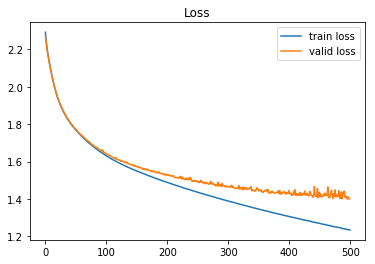

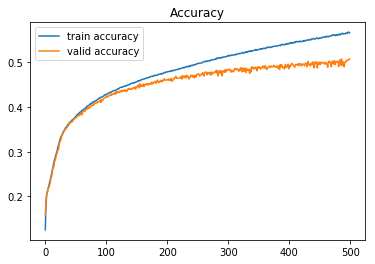

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()